In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import wall_growth_kit as walkit
import seaborn as sns

%load_ext autoreload
%autoreload 2

This part implements the theory for the non-strain-stiffening case.

In [7]:
pressure,num_layers=1.0,20.0
alpha,poisson_ratio=0.25,0.3

PK_rat=0.1
wall_thickness,turnover_rate=0.03,1.0
params={'P':pressure,'alpha':alpha,'K':pressure/PK_rat,'nu':poisson_ratio,'dr':wall_thickness/(num_layers-1),
        'dt':1.0/turnover_rate,'N':num_layers, 'PK_rat':PK_rat}

In [8]:
def constraint_1(temp_vals,temp_params):
    # This constraint comes from the radial stress constraint
    temp_n,temp_nu,temp_a=temp_params['N']-1,temp_params['nu'],temp_params['alpha'] # Note we treat temp_n=num_layers-1
    # for consistency with analytic sum from 0 to N.
    temp_dt,temp_dr=temp_params['dt'],temp_params['dr']
    temp_p,temp_k=temp_params['P'],temp_params['K']
    #
    temp_gfact,temp_r=temp_vals[0]*temp_dt,temp_vals[1]
    temp_x=np.exp(temp_gfact) # exponential growth rate factor for each turnover event.
    #
    temp_1=temp_nu*(temp_x**(temp_n+1)-temp_x)/(temp_x-1)-temp_nu*(temp_n)+temp_dr*temp_n*(temp_n+1)/(2*temp_r)
    temp_2=(temp_r+temp_dr)*temp_p*(temp_a-temp_nu**2)/(temp_k*temp_dr)
    return temp_1-temp_2


def constraint_2(temp_vals,temp_params):
    # This constraint comes from the longitudinal stress constraint
    temp_n,temp_nu,temp_a=temp_params['N']-1,temp_params['nu'],temp_params['alpha'] # Note we treat temp_n=num_layers-1
    # for consistency with analytic sum from 0 to N.
    temp_dt,temp_dr=temp_params['dt'],temp_params['dr']
    temp_p,temp_k=temp_params['P'],temp_params['K']
    #
    temp_gfact,temp_r=temp_vals[0]*temp_dt,temp_vals[1]
    temp_x=np.exp(temp_gfact) # exponential growth rate factor for each turnover event.
    #
    temp_1=temp_r*temp_a*((temp_x**(temp_n+1)-temp_x)/(temp_x-1)-temp_n)+temp_nu*temp_dr*temp_n*(temp_n+1)/2 \
        +temp_dr*temp_a*(((temp_n+1)*temp_x**(temp_n+2)-(temp_n+2)*temp_x**(temp_n+1)+1)/(temp_x-1)**2-1-temp_n*(temp_n+1)/2) \
        +temp_nu*temp_dr**2*temp_n*(temp_n+1)*(2*temp_n+1)/(temp_r*6)
    temp_2=(temp_r+temp_dr)**2*temp_p*(temp_a-temp_nu**2)/(2*temp_k*temp_dr)
    return temp_1-temp_2
    
    
def min_eq(temp_vals,temp_params):
    # We aim to find the roots of this equation in order to determine the possible radii and growth rates
    # at steady state.
#     return np.absolute(constraint_1(temp_vals,temp_params))+np.absolute(constraint_2(temp_vals,temp_params))
    return [constraint_1(temp_vals,temp_params),constraint_2(temp_vals,temp_params)]



In [9]:
init=[0.01, 0.1]
sol = optimize.root(min_eq, init, args=(params),method='hybr')

In [10]:
sol.success

True

In [11]:
sol.x

array([0.00874185, 0.19916108])

In [63]:
def constraint_3(temp_vals,temp_params):
    # This constraint comes from the radial stress constraint
    temp_n,temp_nu,temp_a=temp_params['N']-1,temp_params['nu'],temp_params['alpha'] # Note we treat temp_n=num_layers-1
    # for consistency with analytic sum from 0 to N.
    temp_dt,temp_dr=temp_params['dt'],temp_params['dr']
    temp_p,temp_k=temp_params['P'],temp_params['K']
    #
    temp_gfact,temp_r=temp_vals[0]*temp_dt,temp_vals[1]
    temp_x=np.exp(temp_gfact) # exponential growth rate factor for each turnover event.
    #
    temp_1=((temp_k*temp_dr)/(temp_a-temp_nu**2))*(temp_nu*(temp_x**(temp_n+1)-temp_x)/(temp_x-1)-temp_nu*(temp_n)+temp_dr*temp_n*(temp_n+1)/(2*temp_r))
    temp_2=(temp_r+temp_dr)*temp_p
    print(temp_2)
    return temp_1-temp_2


def constraint_4(temp_vals,temp_params):
    # This constraint comes from the longitudinal stress constraint
    temp_n,temp_nu,temp_a=temp_params['N']-1,temp_params['nu'],temp_params['alpha'] # Note we treat temp_n=num_layers-1
    # for consistency with analytic sum from 0 to N.
    temp_dt,temp_dr=temp_params['dt'],temp_params['dr']
    temp_p,temp_k=temp_params['P'],temp_params['K']
    #
    temp_gfact,temp_r=temp_vals[0]*temp_dt,temp_vals[1]
    temp_x=np.exp(temp_gfact) # exponential growth rate factor for each turnover event.
    #
    temp_1=((temp_k*temp_dr)/(temp_a-temp_nu**2))*(temp_r*temp_a*((temp_x**(temp_n+1)-temp_x)/(temp_x-1)-temp_n)+temp_nu*temp_dr*temp_n*(temp_n+1)/2 \
        +temp_dr*temp_a*(((temp_n+1)*temp_x**(temp_n+2)-(temp_n+2)*temp_x**(temp_n+1)+1)/(temp_x-1)**2-1-temp_n*(temp_n+1)/2) \
        +temp_nu*temp_dr**2*temp_n*(temp_n+1)*(2*temp_n+1)/(temp_r*6))
    temp_2=(temp_r+temp_dr)**2*temp_p/(2)
    print(temp_2)
    return temp_1-temp_2
    
    
def min_eq_v2(temp_vals,temp_params):
    # We aim to find the roots of this equation in order to determine the possible radii and growth rates
    # at steady state.
#     return np.absolute(constraint_1(temp_vals,temp_params))+np.absolute(constraint_2(temp_vals,temp_params))
    return [constraint_3(temp_vals,temp_params),constraint_4(temp_vals,temp_params)]



In [64]:
init=[0.01, 0.1]
sol = optimize.root(min_eq_v2, init, args=(params),method='hybr')

0.10157894736842106
0.0051591412742382275
0.10157894736842106
0.0051591412742382275
0.10157894736842106
0.0051591412742382275
0.10157894736842106
0.0051591412742382275
0.10157894885853717
0.0051591414256026554
0.1365839246195701
0.009327584232242206
0.15614876281367923
0.012191218064121326
0.16464257370188679
0.013553588537590611
0.16630149301250904
0.013828093289094796
0.16666416586185878
0.013888472091214587
0.1665498679328362
0.013869429254222588
0.1665590688304181
0.013870961704827977
0.16655909932186191
0.013870966783454931
0.1665590972513328
0.013870966438589469
0.166559097094067
0.013870966412395418


In [65]:
sol.x

array([0.00666377, 0.16498015])

In [66]:
init=[0.01, 0.1]
sol = optimize.root(min_eq, init, args=(params),method='hybr')

In [67]:
constraint_3(sol.x,params)

0.16655909709406086


-1.0019762797242038e-14

In [70]:
constraint_4(sol.x,params)

0.013870966412394397


4.397524011601206e-15

In [68]:
min_eq(sol.x, params)

[-1.3322676295501878e-13, 5.848099782213012e-14]

In [55]:
sol.x

array([0.00666377, 0.16498015])

This formula seems to actually work now! That's great!

/Users/felixbarber/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/felixbarber/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


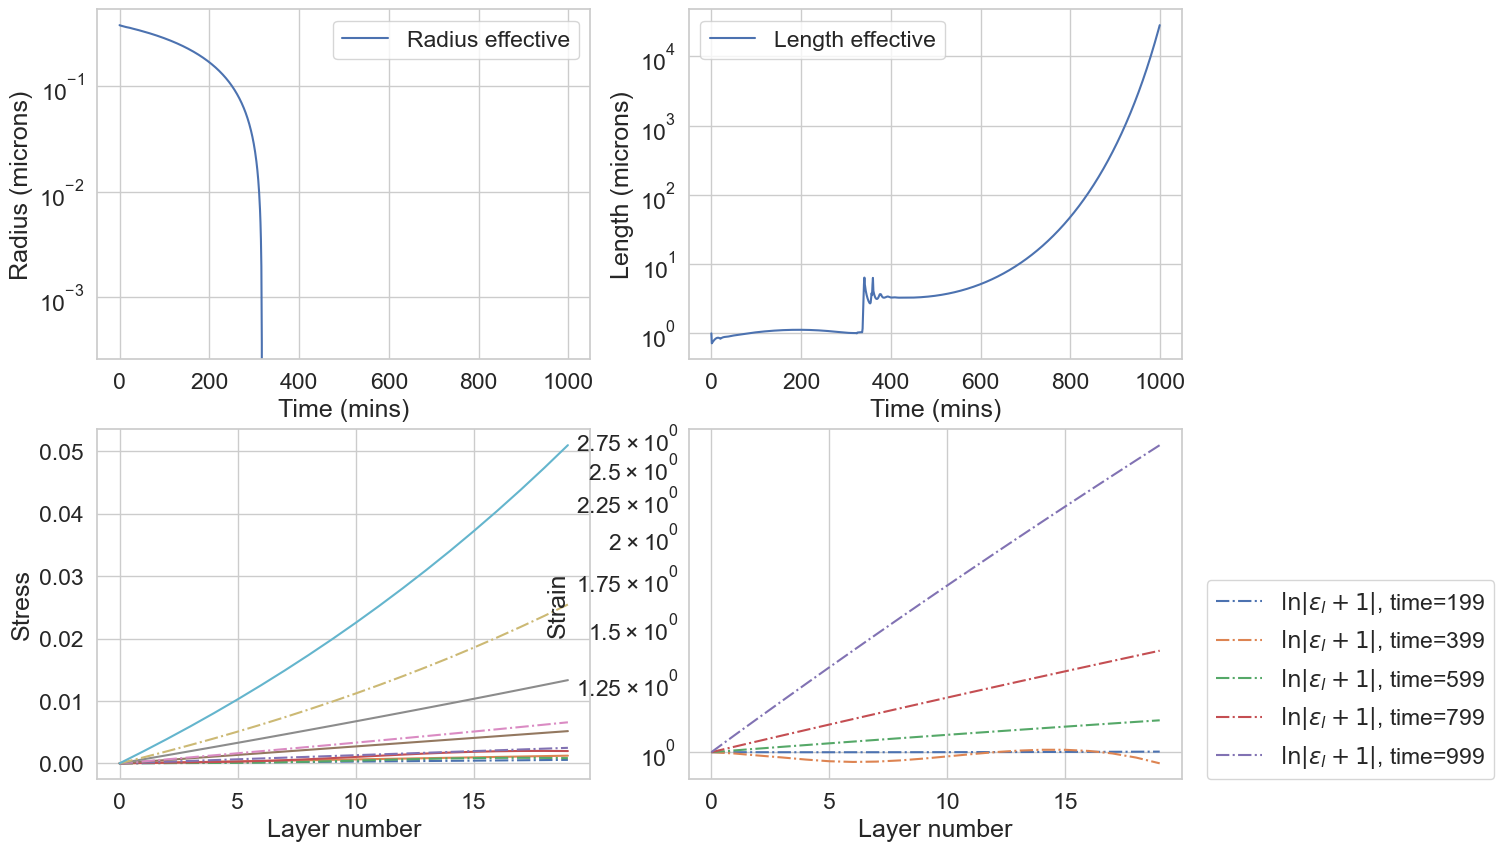

Growth rate (per min) = 0.0077
Doubling time  (mins) = 90.503
Average cell radius = -0.681


<Figure size 640x480 with 0 Axes>

In [13]:
numstep=1000
tvec=np.arange(numstep)
ri,li=0.38326*np.ones(int(num_layers)),1.0*np.exp(-np.log(2.0)*np.arange(0,int(num_layers)).astype(float)/int(num_layers))
# 0.707

radii,lengths,eff_rad,eff_length=walkit.sim_growth_abrupt_v2(tvec,ri,li,params)

rad_vals=np.asarray([temp[0] for temp in radii if len(temp)>0])
l_vals=np.asarray([temp[0] for temp in lengths if len(temp)>0])
stiffnesses=np.ones(ri.shape)

dr=wall_thickness/num_layers
sns.set(font_scale=1.5,style='whitegrid')
fig=plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
# plt.semilogy(tvec[1:len(rad_vals)-1],rad_vals[1:len(rad_vals)-1],label='Radius')
plt.semilogy(tvec,eff_rad,label='Radius effective')
plt.legend()
plt.xlabel('Time (mins)')
plt.ylabel('Radius (microns)')
plt.subplot(2,2,2)
# plt.semilogy(tvec[1:len(rad_vals)-1],l_vals[1:len(l_vals)-1],label='Length')
plt.semilogy(tvec,eff_length,label='Length effective')
plt.legend()
plt.xlabel('Time (mins)')
plt.ylabel('Length (microns)')
plt.subplot(2,2,3)
nu=np.copy(poisson_ratio)
for ind in np.arange(len(tvec)/5-1,len(tvec),len(tvec)/5):
    ind1=ind.astype(int)
    temp_rval,temp_lval=radii[ind1][0],lengths[ind1][0]
    temp_ri,temp_li,temp_si=radii[ind1],lengths[ind1],stiffnesses
    
    eps_r = (temp_rval+dr*np.arange(0,len(temp_ri)).astype(float)-temp_ri)/temp_ri # radial strain in each layer 
    # based on equal spacing between layers of dr.
    eps_l = (temp_lval-temp_li)/temp_li # longitudinal strain in each layer
    # Now we calculate the tensions in each layer
    sig_l = dr*temp_si*((alpha/(alpha-nu**2))*eps_l+(nu/(alpha-nu**2))*eps_r) # the longitudinal tension in each layer 
    sig_r = dr*temp_si*((nu/(alpha-nu**2))*eps_l+(1/(alpha-nu**2))*eps_r) # the radial tension in each layer 
    plt.plot(sig_l,label=r'$\lambda_l/K_0$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-.')
    plt.plot(sig_r,label=r'$\lambda_r/K_0$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-')
plt.xlabel('Layer number')
plt.ylabel('Stress')

plt.subplot(2,2,4)
nu=np.copy(poisson_ratio)
for ind in np.arange(len(tvec)/5-1,len(tvec),len(tvec)/5):
    ind1=ind.astype(int)
    temp_rval,temp_lval=radii[ind1][0],lengths[ind1][0]
    temp_ri,temp_li,temp_si=radii[ind1],lengths[ind1],stiffnesses
    
    eps_r = (temp_rval+dr*np.arange(0,len(temp_ri)).astype(float)-temp_ri)/temp_ri # radial strain in each layer 
    # based on equal spacing between layers of dr.
    eps_l = (temp_lval-temp_li)/temp_li # longitudinal strain in each layer
    plt.semilogy(eps_l+1,label=r'$\ln|\epsilon_l+1|$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-.')
#     plt.plot(eps_r,label=r'$\epsilon_r$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-')
plt.xlabel('Layer number')
plt.ylabel('Strain')
plt.legend(loc=[1.05,0.0])
plt.show()

plt.clf()

out=scipy.stats.linregress(tvec,np.log(eff_length))
print("Growth rate (per min) = {0}".format(np.around(out.slope,4)))
print("Doubling time  (mins) = {0}".format(np.around(np.log(2)/out.slope,3)))
print("Average cell radius = {0}".format(np.around(np.nanmean(eff_rad),3)))

Okay, so this seems to be working fairly well. To get a really good result, let's try seeding the simulations with the converged values for strain.

In [14]:
init=[0.01, 0.1]
sol = optimize.root(min_eq, init, args=(params),method='hybr')

In [15]:
sol.success

True

In [16]:
sol.x

array([0.0019543 , 0.46556656])

In [5]:
numstep=1000
tvec=np.arange(numstep)
ri,li=sol.x[1]*np.ones(int(num_layers)),1.0*np.exp(-sol.x[0]*np.arange(0,int(num_layers)).astype(float)*params['dt'])

radii,lengths,eff_rad,eff_length=walkit.sim_growth_abrupt_v2(tvec,ri,li,params)

rad_vals=np.asarray([temp[0] for temp in radii if len(temp)>0])
l_vals=np.asarray([temp[0] for temp in lengths if len(temp)>0])
stiffnesses=np.ones(ri.shape)

dr=wall_thickness/num_layers
sns.set(font_scale=1.5,style='whitegrid')
fig=plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
# plt.semilogy(tvec[1:len(rad_vals)-1],rad_vals[1:len(rad_vals)-1],label='Radius')
plt.semilogy(tvec,eff_rad,label='Radius effective')
plt.legend()
plt.xlabel('Time (mins)')
plt.ylabel('Radius (microns)')
plt.subplot(2,2,2)
# plt.semilogy(tvec[1:len(rad_vals)-1],l_vals[1:len(l_vals)-1],label='Length')
plt.semilogy(tvec,eff_length,label='Length effective')
plt.legend()
plt.xlabel('Time (mins)')
plt.ylabel('Length (microns)')
plt.subplot(2,2,3)
nu=np.copy(poisson_ratio)
for ind in np.arange(len(tvec)/5-1,len(tvec),len(tvec)/5):
    ind1=ind.astype(int)
    temp_rval,temp_lval=radii[ind1][0],lengths[ind1][0]
    temp_ri,temp_li,temp_si=radii[ind1],lengths[ind1],stiffnesses
    
    eps_r = (temp_rval+dr*np.arange(0,len(temp_ri)).astype(float)-temp_ri)/temp_ri # radial strain in each layer 
    # based on equal spacing between layers of dr.
    eps_l = (temp_lval-temp_li)/temp_li # longitudinal strain in each layer
    # Now we calculate the tensions in each layer
    sig_l = dr*temp_si*((alpha/(alpha-nu**2))*eps_l+(nu/(alpha-nu**2))*eps_r) # the longitudinal tension in each layer 
    sig_r = dr*temp_si*((nu/(alpha-nu**2))*eps_l+(1/(alpha-nu**2))*eps_r) # the radial tension in each layer 
    plt.plot(sig_l,label=r'$\lambda_l/K_0$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-.')
    plt.plot(sig_r,label=r'$\lambda_r/K_0$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-')
plt.xlabel('Layer number')
plt.ylabel('Stress')

plt.subplot(2,2,4)
nu=np.copy(poisson_ratio)
for ind in np.arange(len(tvec)/5-1,len(tvec),len(tvec)/5):
    ind1=ind.astype(int)
    temp_rval,temp_lval=radii[ind1][0],lengths[ind1][0]
    temp_ri,temp_li,temp_si=radii[ind1],lengths[ind1],stiffnesses
    
    eps_r = (temp_rval+dr*np.arange(0,len(temp_ri)).astype(float)-temp_ri)/temp_ri # radial strain in each layer 
    # based on equal spacing between layers of dr.
    eps_l = (temp_lval-temp_li)/temp_li # longitudinal strain in each layer
    plt.semilogy(eps_l+1,label=r'$\ln|\epsilon_l+1|$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-.')
#     plt.plot(eps_r,label=r'$\epsilon_r$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-')
plt.xlabel('Layer number')
plt.ylabel('Strain')
plt.legend(loc=[1.05,0.0])
plt.show()

plt.clf()

out=scipy.stats.linregress(tvec,np.log(eff_length))
print("Growth rate (per min) = {0}".format(np.around(out.slope,5)))
print("Doubling time  (mins) = {0}".format(np.around(np.log(2)/out.slope,4)))
print("Average cell radius = {0}".format(np.around(np.nanmean(eff_rad),5)))

NameError: name 'sol' is not defined

In [6]:
print(sol.x)

NameError: name 'sol' is not defined

Surprisingly enough, seeding our simulations with our previously calculated value doesn't change things much. It appears that we're slightly underestimating our initial guess of radius for some reason, but it's still very close!

So, our goal before Tuesday is the following:

1) We want to see what the steady state radius and growth rate look like for changing $\alpha$ and $\nu$.

2) We want to have a phase space plot for the convergence when varying $\alpha$ and $\nu$ for a specific value of initial radius, to check what the boundary is for convergence.

First, let's see what the steady state radius and growth rate look like for changing $\alpha$ and $\nu$.

In [262]:
sol.success

True

In [333]:
pressure,num_layers=1.0,30.0
alpha,poisson_ratio=0.23,0.45
layer_thickness=0.001

PK_rat=0.1
wall_thickness,turnover_rate=0.03,1.0
params={'P':pressure,'alpha':alpha,'K':pressure/PK_rat,'nu':poisson_ratio,'dr':layer_thickness,
        'dt':1.0/turnover_rate,'N':num_layers, 'PK_rat':PK_rat}

nus=np.linspace(0.005,0.5,101)
alphas=np.linspace(0.005,0.5,101)
sol_rad=np.zeros([len(alphas),len(nus)])
sol_gr=np.zeros([len(alphas),len(nus)])

for ind1 in range(len(alphas)):
    temp_alpha1=alphas[ind1].copy()
    params['alpha']=temp_alpha1
    for ind2 in range(len(nus)):
        temp_nu1 = nus[ind2].copy()
        params['nu']=temp_nu1
        if ind2==0 or sol.x[0]<0 or sol.x[1]<0:
            init = [0.002,0.2]
        else:
            init = sol.x
        sol = optimize.root(min_eq, init, args=(params),method='hybr')
        if sol.success: # if we converged
            sol_rad[ind1,ind2]=sol.x[1]
            sol_gr[ind1,ind2]=sol.x[0]
        else:
            sol_rad[ind1,ind2]=-0.05
            sol_gr[ind1,ind2]=-0.05

In [334]:
def constraint_plot(temp_nu,temp_xi):
    return (1+(temp_xi-2)*temp_nu)/(2*temp_xi)

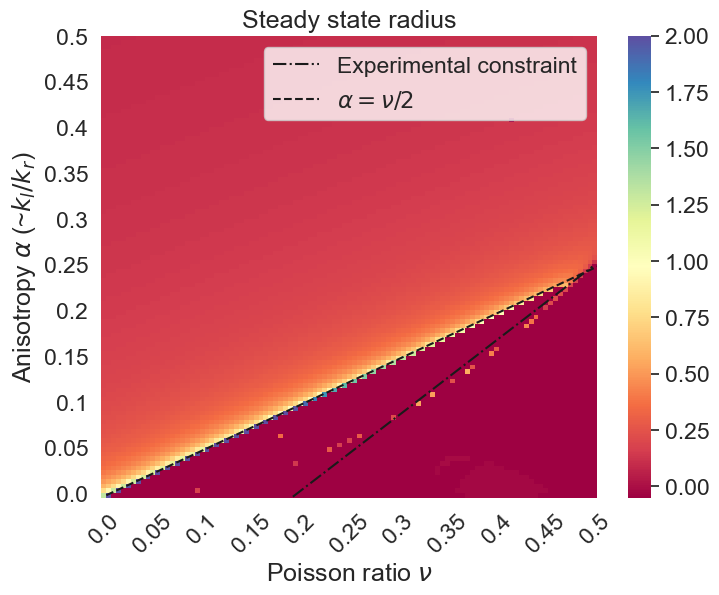

<Figure size 640x480 with 0 Axes>

In [356]:
temp_y=alphas[::-1].copy()
temp_x=nus.copy()

fig=plt.figure(figsize=[8,6])
ax=plt.subplot(1,1,1)

yticks = temp_y
keptticks = np.around(yticks[::int(len(yticks)/10)],2)
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/10)] = keptticks

xticks = temp_x
keptticks = np.around(xticks[::int(len(xticks)/10)],2)
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/10)] = keptticks
sns.set_style('whitegrid')
sns.heatmap(sol_rad[::-1,:],xticklabels=xticks,yticklabels=yticks,cmap='Spectral',vmax=2)
ax=plt.gca()

rat=(-4.8669*10**(-5))/(1.5809*10**(-5))
yv=constraint_plot(nus,rat)
ind=np.nonzero(yv>0)[0][0]
# plt.plot(xv,yv,label='Constraint')
temp_xv=np.arange(ind,len(nus))
temp_yv=len(alphas)-yv[ind:]*len(alphas)/np.amax(alphas)
plt.plot(temp_xv,temp_yv,label='Experimental constraint',color='k',linestyle='-.')


yv=0.5*xv
temp_xv=np.arange(1,len(nus)+1)
temp_yv=len(alphas)*(1-yv/np.amax(alphas))
plt.plot(temp_xv,temp_yv,label=r'$\alpha=\nu/2$',color='k',linestyle='--')
plt.legend()
plt.xticks(rotation = 45)
plt.yticks(rotation = .001)
plt.xlabel(r'Poisson ratio $\nu$')
plt.ylabel(r'Anisotropy $\alpha$ (~$ k_l/k_r$)')
plt.title('Steady state radius')
plt.show()
fig.savefig('./quality_figs/steady_state_radius_model.png',dpi=300,bbox_inches='tight')
plt.clf()

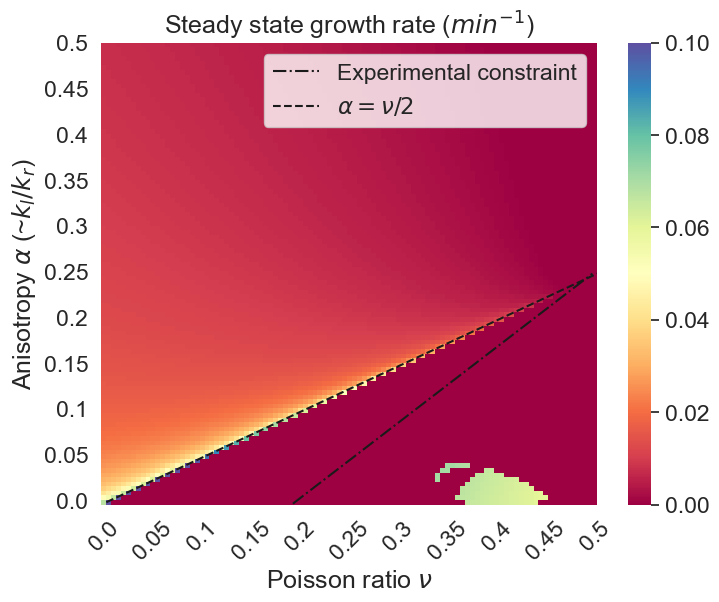

<Figure size 640x480 with 0 Axes>

In [359]:
temp_y=alphas[::-1].copy()
temp_x=nus.copy()

yticks = temp_y
keptticks = np.around(yticks[::int(len(yticks)/10)],2)
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/10)] = keptticks

xticks = temp_x
keptticks = np.around(xticks[::int(len(xticks)/10)],2)
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/10)] = keptticks
fig=plt.figure(figsize=[8,6])
ax=plt.subplot(1,1,1)
sns.heatmap(sol_gr[::-1,:],xticklabels=xticks,yticklabels=yticks,cmap='Spectral',vmin=0.0,vmax=0.1)
# sns.heatmap(sol_gr[::-1,:],xticklabels=xticks,yticklabels=yticks,cmap='Spectral',vmax=0.1)

rat=(-4.8669*10**(-5))/(1.5809*10**(-5))
yv=constraint_plot(nus,rat)
ind=np.nonzero(yv>0)[0][0]
# plt.plot(xv,yv,label='Constraint')
temp_xv=np.arange(ind,len(nus))
temp_yv=len(alphas)-yv[ind:]*len(alphas)/np.amax(alphas)
plt.plot(temp_xv,temp_yv,label='Experimental constraint',color='k',linestyle='-.')

yv=0.5*xv
temp_xv=np.arange(1,len(nus)+1)
temp_yv=len(alphas)*(1-yv/np.amax(alphas))
plt.plot(temp_xv,temp_yv,label=r'$\alpha=\nu/2$',color='k',linestyle='--')
rat

ax=plt.gca()
plt.xticks(rotation = 45)
plt.yticks(rotation = .001)
plt.xlabel(r'Poisson ratio $\nu$')
plt.ylabel(r'Anisotropy $\alpha$ (~$ k_l/k_r$)')
plt.title('Steady state growth rate ($min^{-1}$)')
plt.legend()

plt.show()
fig.savefig('./quality_figs/steady_state_gr_model.png',dpi=300,bbox_inches='tight')
# fig.savefig('./quality_figs/steady_state_gr_model_unfiltered.png',dpi=300,bbox_inches='tight')
plt.clf()

In [360]:
rat

-3.078562843949649

Okay, so these aren't looking too bad. It appears that all the odd-looking points (visible in the "unfiltered" version) have a negative growth rate which is clearly unphysical. This includes that "cut" into the non-converging region.

Now, let's see whether the behavior at around $\nu=0.4$, $\alpha=0.02$ is actually stable.

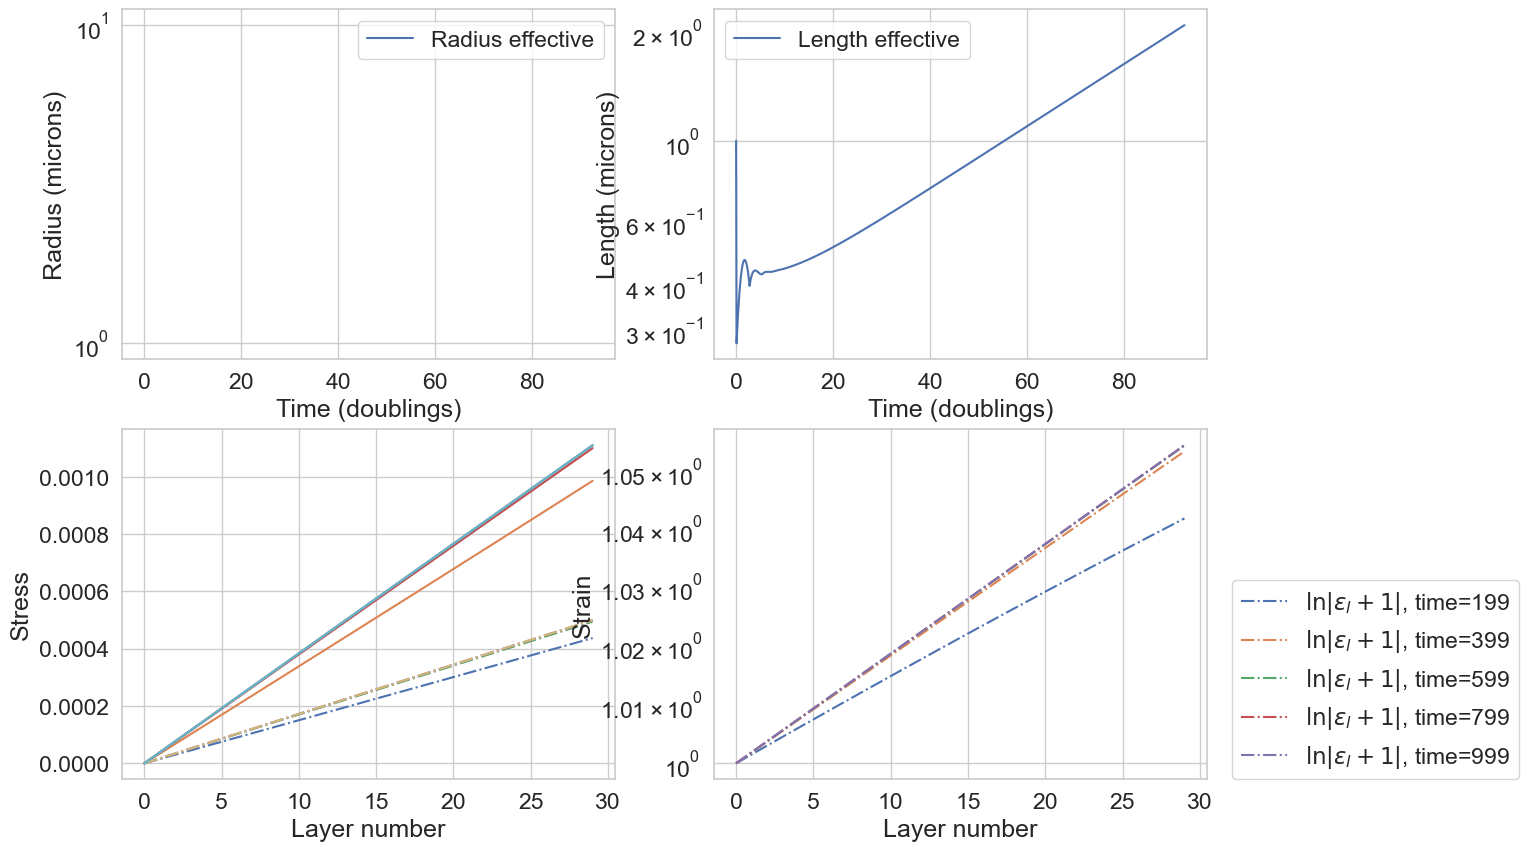

Growth rate (per min) = 0.00081
predicted growth rate = 0.06414
Average cell radius = -0.10195
predicted cell radius = -0.0188


<Figure size 640x480 with 0 Axes>

In [340]:
pressure,num_layers=1.0,30.0
alpha_val,poisson_ratio_val=0.02,0.4
layer_thickness=0.001
ind_alpha,ind_nu=np.nonzero(alphas>alpha_val)[0][0], np.nonzero(nus>poisson_ratio_val)[0][0]

sol=[sol_gr[ind_alpha,ind_nu],sol_rad[ind_alpha,ind_nu]]
alpha,poisson_ratio=alphas[ind_alpha],nus[ind_nu]
PK_rat=0.1
wall_thickness,turnover_rate=0.03,1.0
params={'P':pressure,'alpha':alpha,'K':pressure/PK_rat,'nu':poisson_ratio,'dr':layer_thickness,
        'dt':1.0/turnover_rate,'N':num_layers, 'PK_rat':PK_rat}

numstep=1000



tvec=np.arange(numstep)
ri,li=sol[1]*np.ones(int(num_layers)),1.0*np.exp(-sol[0]*np.arange(0,int(num_layers)).astype(float)*params['dt'])

radii,lengths,eff_rad,eff_length=walkit.sim_growth_abrupt_v2(tvec,ri,li,params)

rad_vals=np.asarray([temp[0] for temp in radii if len(temp)>0])
l_vals=np.asarray([temp[0] for temp in lengths if len(temp)>0])
stiffnesses=np.ones(ri.shape)

tvec1=tvec*sol[0]/np.log(2)  # normalized by doubling time
dr=wall_thickness/num_layers
sns.set(font_scale=1.5,style='whitegrid')
fig=plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
# plt.semilogy(tvec[1:len(rad_vals)-1],rad_vals[1:len(rad_vals)-1],label='Radius')
plt.semilogy(tvec1,eff_rad,label='Radius effective')
plt.legend()
plt.xlabel('Time (doublings)')
plt.ylabel('Radius (microns)')
plt.subplot(2,2,2)
# plt.semilogy(tvec[1:len(rad_vals)-1],l_vals[1:len(l_vals)-1],label='Length')
plt.semilogy(tvec1,eff_length,label='Length effective')
plt.legend()
plt.xlabel('Time (doublings)')
plt.ylabel('Length (microns)')
plt.subplot(2,2,3)
nu=np.copy(poisson_ratio)
for ind in np.arange(len(tvec)/5-1,len(tvec),len(tvec)/5):
    ind1=ind.astype(int)
    temp_rval,temp_lval=radii[ind1][0],lengths[ind1][0]
    temp_ri,temp_li,temp_si=radii[ind1],lengths[ind1],stiffnesses
    
    eps_r = (temp_rval+dr*np.arange(0,len(temp_ri)).astype(float)-temp_ri)/temp_ri # radial strain in each layer 
    # based on equal spacing between layers of dr.
    eps_l = (temp_lval-temp_li)/temp_li # longitudinal strain in each layer
    # Now we calculate the tensions in each layer
    sig_l = dr*temp_si*((alpha/(alpha-nu**2))*eps_l+(nu/(alpha-nu**2))*eps_r) # the longitudinal tension in each layer 
    sig_r = dr*temp_si*((nu/(alpha-nu**2))*eps_l+(1/(alpha-nu**2))*eps_r) # the radial tension in each layer 
    plt.plot(sig_l,label=r'$\lambda_l/K_0$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-.')
    plt.plot(sig_r,label=r'$\lambda_r/K_0$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-')
plt.xlabel('Layer number')
plt.ylabel('Stress')

plt.subplot(2,2,4)
nu=np.copy(poisson_ratio)
for ind in np.arange(len(tvec)/5-1,len(tvec),len(tvec)/5):
    ind1=ind.astype(int)
    temp_rval,temp_lval=radii[ind1][0],lengths[ind1][0]
    temp_ri,temp_li,temp_si=radii[ind1],lengths[ind1],stiffnesses
    
    eps_r = (temp_rval+dr*np.arange(0,len(temp_ri)).astype(float)-temp_ri)/temp_ri # radial strain in each layer 
    # based on equal spacing between layers of dr.
    eps_l = (temp_lval-temp_li)/temp_li # longitudinal strain in each layer
    plt.semilogy(eps_l+1,label=r'$\ln|\epsilon_l+1|$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-.')
#     plt.plot(eps_r,label=r'$\epsilon_r$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-')
plt.xlabel('Layer number')
plt.ylabel('Strain')
plt.legend(loc=[1.05,0.0])
plt.show()

plt.clf()

out=scipy.stats.linregress(tvec[:200],np.log(eff_length[:200]))
print("Growth rate (per min) = {0}".format(np.around(out.slope,5)))
print("predicted growth rate = {0}".format(np.around(sol[0],5)))
print("Average cell radius = {0}".format(np.around(np.nanmean(eff_rad[:200]),5)))
print("predicted cell radius = {0}".format(np.around(sol[1],5)))

Now, let's try a few sample datapoints to see whether our model really captures the simulations.

In [313]:
pressure,num_layers=1.0,30.0
alpha,poisson_ratio=0.23,0.45
layer_thickness=0.001

PK_rat=0.1
wall_thickness,turnover_rate=0.03,1.0
params={'P':pressure,'alpha':alpha,'K':pressure/PK_rat,'nu':poisson_ratio,'dr':layer_thickness,
        'dt':1.0/turnover_rate,'N':num_layers, 'PK_rat':PK_rat}

In [357]:
alpha_temp=np.linspace(0.15,0.30,4)
nus_temp = np.linspace(0.01,0.25,25)

sim_gr=np.zeros([len(alpha_temp),len(nus_temp)])
sim_rad=sim_gr.copy()
mod_gr=sim_gr.copy()
mod_rad=sim_gr.copy()
for ind1 in range(len(alpha_temp)):
    params['alpha']=alpha_temp[ind1].copy()
    for ind2 in range(len(nus_temp)):
        params['nu']=nus_temp[ind2].copy()
        if ind2==0:
            init=[0.01, 0.1]
        else:
            init=sol.x
        sol = optimize.root(min_eq, init, args=(params),method='hybr')
        if sol.success: # if we converged
            mod_rad[ind1,ind2]=sol.x[1]
            mod_gr[ind1,ind2]=sol.x[0]
            # Now we do the simulations, seeding based on the growth rate and radii given.
            numstep=1000
            tvec=np.arange(numstep)
            ri,li=sol.x[1]*np.ones(int(num_layers)),1.0*np.exp(-sol.x[0]*np.arange(0,int(num_layers)).astype(float)*params['dt'])

            radii,lengths,eff_rad,eff_length=walkit.sim_growth_abrupt_v2(tvec,ri,li,params)
            # Now we fit these data, but we do it in a smart way, since we expect based on the simulations that
            cutoff=np.nonzero(tvec>2*np.log(2)/sol.x[0])[0][0]
#             print(ind1, ind2, cutoff,np.log(2)/sol.x[0])
            out=scipy.stats.linregress(tvec[:cutoff],np.log(eff_length[:cutoff]))
            sim_gr[ind1,ind2]=out.slope
            sim_rad[ind1,ind2]=np.nanmean(eff_rad[:cutoff])
        else:
            mod_rad[ind1,ind2]=-0.05
            mod_gr[ind1,ind2]=-0.05 
            sim_gr[ind1,ind2]=-0.05
            sim_rad[ind1,ind2]=-0.05

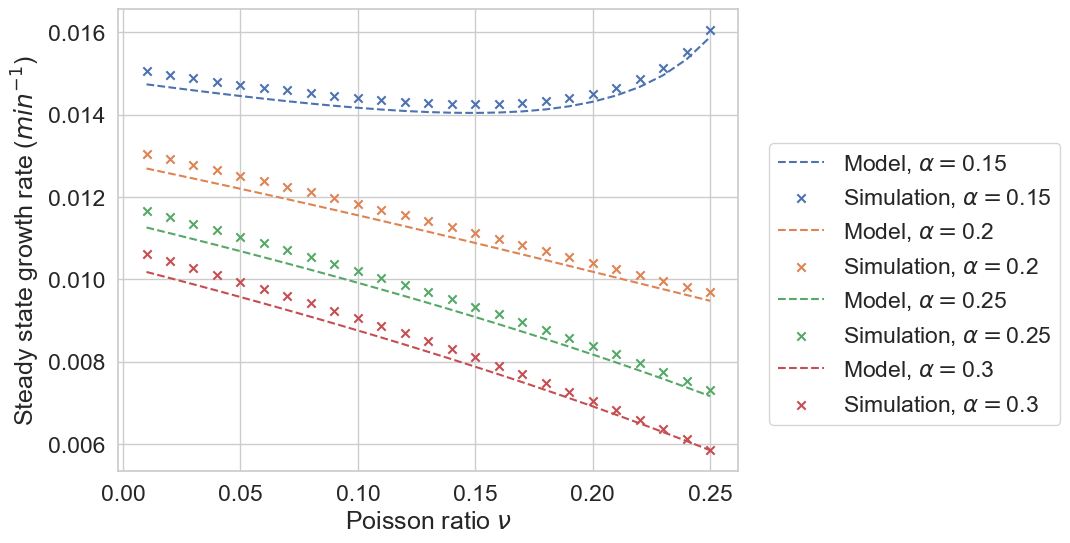

<Figure size 640x480 with 0 Axes>

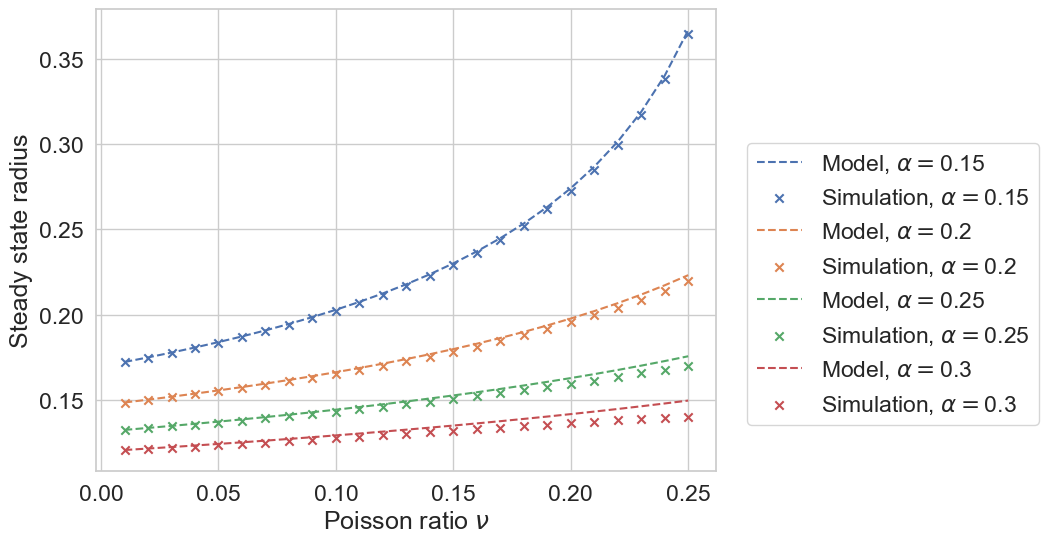

<Figure size 640x480 with 0 Axes>

In [358]:
fig=plt.figure(figsize=[8,6])
for ind in range(len(alpha_temp)):
    temp_color=sns.color_palette()[np.mod(ind,len(sns.color_palette()))]
    plt.plot(nus_temp,mod_gr[ind,:],label=r'Model, $\alpha=${0}'.format(np.around(alpha_temp[ind],2)),color=temp_color,linestyle='--')
    plt.scatter(nus_temp,sim_gr[ind,:],label=r'Simulation, $\alpha=${0}'.format(np.around(alpha_temp[ind],2)),color=temp_color,marker='x')
plt.legend(loc=[1.05,0.1])
plt.ylabel('Steady state growth rate ($min^{-1}$)')
plt.xlabel(r'Poisson ratio $\nu$')
fig.savefig('./quality_figs/model_simulations_comp_gr.png',dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

fig=plt.figure(figsize=[8,6])
for ind in range(len(alpha_temp)):
    temp_color=sns.color_palette()[np.mod(ind,len(sns.color_palette()))]
    plt.plot(nus_temp,mod_rad[ind,:],label=r'Model, $\alpha=${0}'.format(np.around(alpha_temp[ind],2)),color=temp_color,linestyle='--')
    plt.scatter(nus_temp,sim_rad[ind,:],label=r'Simulation, $\alpha=${0}'.format(np.around(alpha_temp[ind],2)),color=temp_color,marker='x')
plt.legend(loc=[1.05,0.1])
plt.ylabel('Steady state radius')
plt.xlabel(r'Poisson ratio $\nu$')
fig.savefig('./quality_figs/model_simulations_comp_rad.png',dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

Let's look at an example of these simulations to see what the issue is.

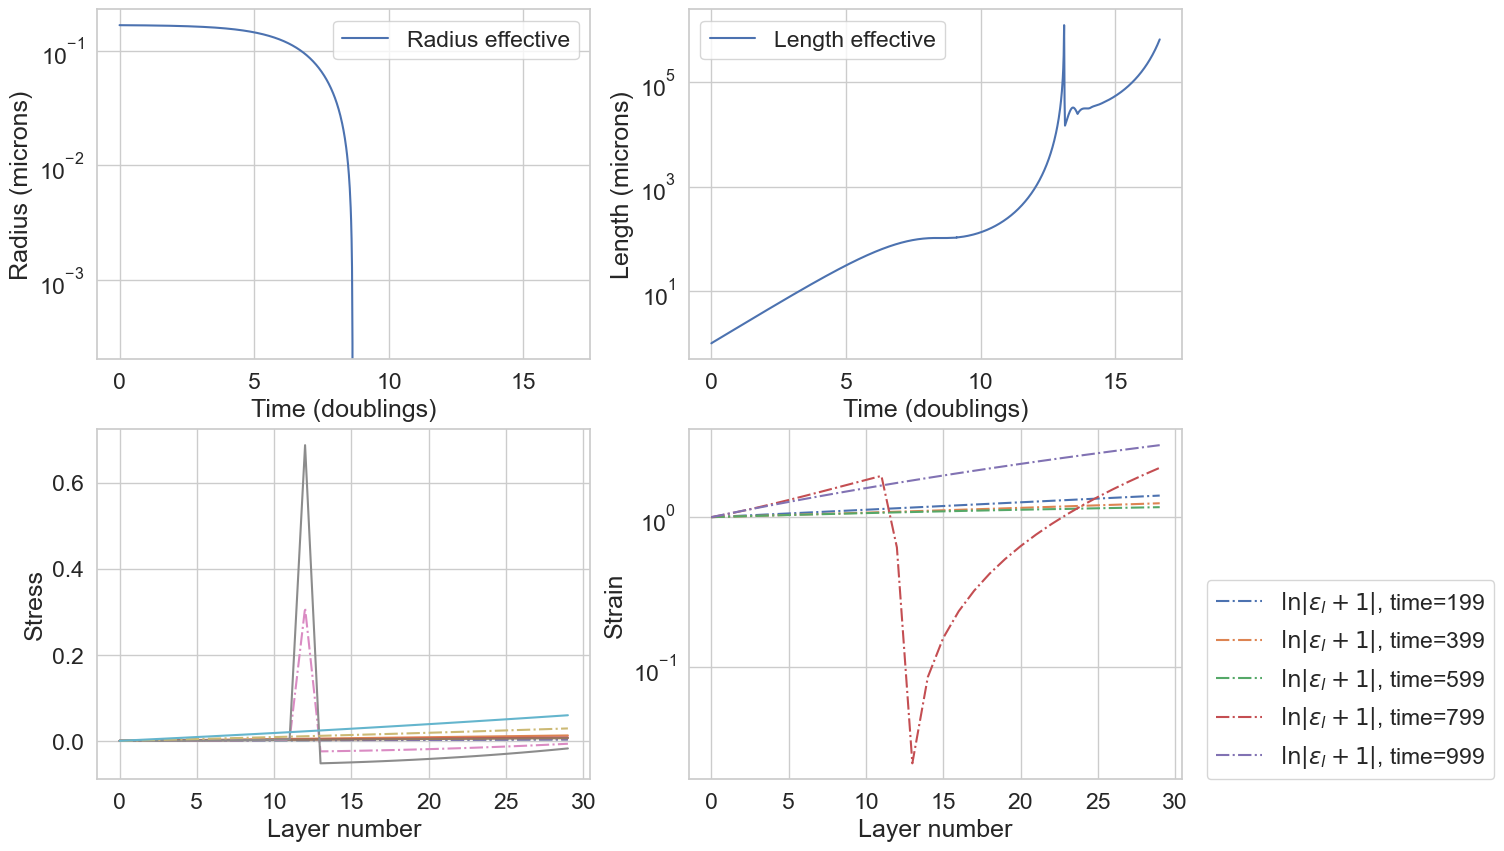

Growth rate (per min) = 0.01174
predicted growth rate = 0.01155
Average cell radius = 0.16414
predicted cell radius = 0.16636


<Figure size 640x480 with 0 Axes>

In [306]:
pressure,num_layers=1.0,30.0
alpha,poisson_ratio=0.23,0.45
layer_thickness=0.001

PK_rat=0.1
wall_thickness,turnover_rate=0.03,1.0
params={'P':pressure,'alpha':alpha,'K':pressure/PK_rat,'nu':poisson_ratio,'dr':layer_thickness,
        'dt':1.0/turnover_rate,'N':num_layers, 'PK_rat':PK_rat}

numstep=1000
params['alpha']=0.2
params['nu']=0.1
sol = optimize.root(min_eq, [0.01, 0.4], args=(params),method='hybr')

tvec=np.arange(numstep)
ri,li=sol.x[1]*np.ones(int(num_layers)),1.0*np.exp(-sol.x[0]*np.arange(0,int(num_layers)).astype(float)*params['dt'])

radii,lengths,eff_rad,eff_length=walkit.sim_growth_abrupt_v2(tvec,ri,li,params)

rad_vals=np.asarray([temp[0] for temp in radii if len(temp)>0])
l_vals=np.asarray([temp[0] for temp in lengths if len(temp)>0])
stiffnesses=np.ones(ri.shape)

tvec1=tvec*sol.x[0]/np.log(2)  # normalized by doubling time
dr=wall_thickness/num_layers
sns.set(font_scale=1.5,style='whitegrid')
fig=plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
# plt.semilogy(tvec[1:len(rad_vals)-1],rad_vals[1:len(rad_vals)-1],label='Radius')
plt.semilogy(tvec1,eff_rad,label='Radius effective')
plt.legend()
plt.xlabel('Time (doublings)')
plt.ylabel('Radius (microns)')
plt.subplot(2,2,2)
# plt.semilogy(tvec[1:len(rad_vals)-1],l_vals[1:len(l_vals)-1],label='Length')
plt.semilogy(tvec1,eff_length,label='Length effective')
plt.legend()
plt.xlabel('Time (doublings)')
plt.ylabel('Length (microns)')
plt.subplot(2,2,3)
nu=np.copy(poisson_ratio)
for ind in np.arange(len(tvec)/5-1,len(tvec),len(tvec)/5):
    ind1=ind.astype(int)
    temp_rval,temp_lval=radii[ind1][0],lengths[ind1][0]
    temp_ri,temp_li,temp_si=radii[ind1],lengths[ind1],stiffnesses
    
    eps_r = (temp_rval+dr*np.arange(0,len(temp_ri)).astype(float)-temp_ri)/temp_ri # radial strain in each layer 
    # based on equal spacing between layers of dr.
    eps_l = (temp_lval-temp_li)/temp_li # longitudinal strain in each layer
    # Now we calculate the tensions in each layer
    sig_l = dr*temp_si*((alpha/(alpha-nu**2))*eps_l+(nu/(alpha-nu**2))*eps_r) # the longitudinal tension in each layer 
    sig_r = dr*temp_si*((nu/(alpha-nu**2))*eps_l+(1/(alpha-nu**2))*eps_r) # the radial tension in each layer 
    plt.plot(sig_l,label=r'$\lambda_l/K_0$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-.')
    plt.plot(sig_r,label=r'$\lambda_r/K_0$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-')
plt.xlabel('Layer number')
plt.ylabel('Stress')

plt.subplot(2,2,4)
nu=np.copy(poisson_ratio)
for ind in np.arange(len(tvec)/5-1,len(tvec),len(tvec)/5):
    ind1=ind.astype(int)
    temp_rval,temp_lval=radii[ind1][0],lengths[ind1][0]
    temp_ri,temp_li,temp_si=radii[ind1],lengths[ind1],stiffnesses
    
    eps_r = (temp_rval+dr*np.arange(0,len(temp_ri)).astype(float)-temp_ri)/temp_ri # radial strain in each layer 
    # based on equal spacing between layers of dr.
    eps_l = (temp_lval-temp_li)/temp_li # longitudinal strain in each layer
    plt.semilogy(eps_l+1,label=r'$\ln|\epsilon_l+1|$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-.')
#     plt.plot(eps_r,label=r'$\epsilon_r$, time={}'.format(np.around(tvec[ind1],2)),linestyle='-')
plt.xlabel('Layer number')
plt.ylabel('Strain')
plt.legend(loc=[1.05,0.0])
plt.show()

plt.clf()

out=scipy.stats.linregress(tvec[:200],np.log(eff_length[:200]))
print("Growth rate (per min) = {0}".format(np.around(out.slope,5)))
print("predicted growth rate = {0}".format(np.around(sol.x[0],5)))
print("Average cell radius = {0}".format(np.around(np.nanmean(eff_rad[:200]),5)))
print("predicted cell radius = {0}".format(np.around(sol.x[1],5)))

Okay, so it appears that the issue is that for thin cell walls, the solution is even less stable. Perhaps this makes sense, since the growth rate is much larger, so we are actually simulating a lot more growth in the case where we have few layers!